In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score, precision_recall_curve

# Read csv file
data = pd.read_csv('creditcard.csv')

print(data)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [36]:
# get first five rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [37]:
# Get summary statistics of the dataset
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [38]:
# get information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
# check the missing values of the dataste
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


building process of logistic regression (using v1,v2) (preprocessing step)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 60 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=60, random_state=1)

# Selection of 100 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=100, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V1', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)


# predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)


Accuracy: 0.6458333333333334
Confusion Matrix:
[[26  2]
 [15  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75        28
           1       0.71      0.25      0.37        20

    accuracy                           0.65        48
   macro avg       0.67      0.59      0.56        48
weighted avg       0.67      0.65      0.59        48



Accuracy with custom threshold: 0.7708333333333334
Confusion Matrix with custom threshold:
[[25  3]
 [ 8 12]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.80      0.60      0.69        20

    accuracy                           0.77        48
   macro avg       0.78      0.75      0.75        48
weighted avg       0.78      0.77      0.76        48



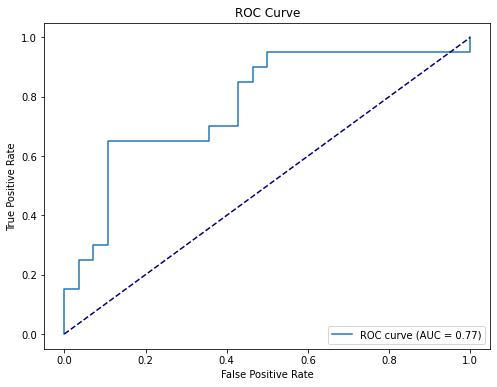

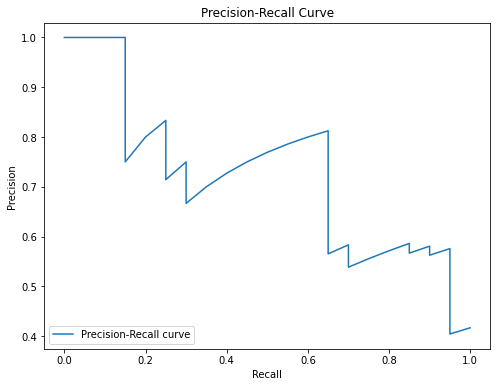

In [41]:
# going to Predict probabilities instead of class labels
y_probs_balanced = model_balanced.predict_proba(X_test_balanced)[:, 1]

# set threshold value
threshold = 0.3
y_pred_custom_threshold = (y_probs_balanced >= threshold).astype(int)

# Evaluating the model with the custom threshold
accuracy_custom = accuracy_score(y_test_balanced, y_pred_custom_threshold)
conf_matrix_custom = confusion_matrix(y_test_balanced, y_pred_custom_threshold)
class_report_custom = classification_report(y_test_balanced, y_pred_custom_threshold)

# results
print(f"Accuracy with custom threshold: {accuracy_custom}")
print("Confusion Matrix with custom threshold:")
print(conf_matrix_custom)
print("Classification Report with custom threshold:")
print(class_report_custom)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_probs_balanced)
roc_auc = roc_auc_score(y_test_balanced, y_probs_balanced)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_balanced, y_probs_balanced)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# preprocessing phase 
# Select columns
selected_columns = ['Time', 'V2', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 60 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=60, random_state=1)

# Selection of 100 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=100, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V2', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)


Accuracy: 0.75
Confusion Matrix:
[[27  1]
 [11  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        28
           1       0.90      0.45      0.60        20

    accuracy                           0.75        48
   macro avg       0.81      0.71      0.71        48
weighted avg       0.79      0.75      0.73        48



Accuracy with custom threshold: 0.875
Confusion Matrix with custom threshold:
[[25  3]
 [ 3 17]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.85      0.85      0.85        20

    accuracy                           0.88        48
   macro avg       0.87      0.87      0.87        48
weighted avg       0.88      0.88      0.88        48



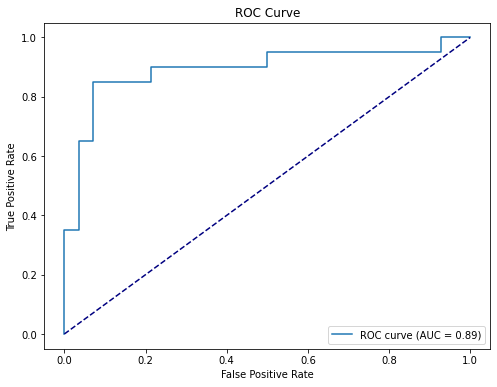

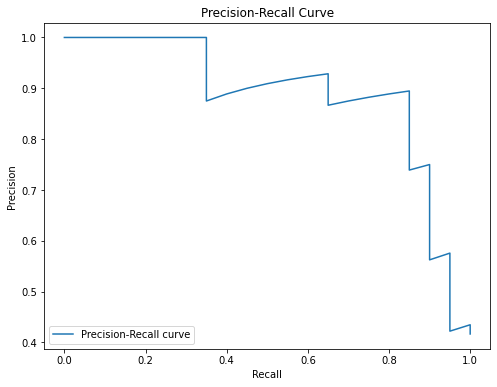

In [43]:
# going to Predict probabilities instead of class labels
y_probs_balanced = model_balanced.predict_proba(X_test_balanced)[:, 1]

# set threshold value
threshold = 0.3
y_pred_custom_threshold = (y_probs_balanced >= threshold).astype(int)

# Evaluating the model with the custom threshold
accuracy_custom = accuracy_score(y_test_balanced, y_pred_custom_threshold)
conf_matrix_custom = confusion_matrix(y_test_balanced, y_pred_custom_threshold)
class_report_custom = classification_report(y_test_balanced, y_pred_custom_threshold)

# results
print(f"Accuracy with custom threshold: {accuracy_custom}")
print("Confusion Matrix with custom threshold:")
print(conf_matrix_custom)
print("Classification Report with custom threshold:")
print(class_report_custom)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_probs_balanced)
roc_auc = roc_auc_score(y_test_balanced, y_probs_balanced)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_balanced, y_probs_balanced)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

building process of random forest (using v1,v2) (preprocessing step)

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 60 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=60, random_state=1)

# Selection of 100 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=100, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V1', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the Random Forest classifier
model_balanced = RandomForestClassifier(random_state=1)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

Accuracy: 0.7291666666666666
Confusion Matrix:
[[28  0]
 [13  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        28
           1       1.00      0.35      0.52        20

    accuracy                           0.73        48
   macro avg       0.84      0.68      0.67        48
weighted avg       0.82      0.73      0.69        48



In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V2', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 60 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=60, random_state=1)

# Selection of 100 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=100, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V2', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the Random Forest classifier
model_balanced = RandomForestClassifier(random_state=1)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

Accuracy: 0.8125
Confusion Matrix:
[[26  2]
 [ 7 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.87      0.65      0.74        20

    accuracy                           0.81        48
   macro avg       0.83      0.79      0.80        48
weighted avg       0.82      0.81      0.81        48

